# **Project Title: Kidney Disease Prediction using Machine Learning**

# **🎯 Aim:**
## **To develop a machine learning model that can accurately classify whether a patient has chronic kidney disease (CKD) or not, based on clinical and laboratory attributes.**


### **Importing Required Libraries**
This cell imports all the essential libraries used throughout the project:
- `numpy` & `pandas` for data handling;
- `matplotlib` & `seaborn` for visualizations;
- `warnings` to suppress unwanted warnings;
- `sklearn` preprocessing and model selection modules for data scaling and splitting.


In [1]:
# Importing necessary liberaries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()


###  **Loading and Displaying the Dataset**  
Loads the kidney disease dataset and displays the first five rows to understand the data structure, features, and sample values.


In [2]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#Shape of dataframe
df.shape

(400, 26)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
# duplicates - cleaning part
df.duplicated().sum()

np.int64(0)

In [6]:
# missing value checks
df.isnull().sum().sum()

np.int64(1009)

there are a total of 1009 missing values in the dataset

In [7]:
#Provides a concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

The features pcv, wc, and rc currently have an object (string) datatype but should be numerical (float or int). These require data type correction for proper analysis.
Other object columns are likely categorical and will need encoding for modeling.

In [8]:
df.isnull().sum()/len(df)*100

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


Several columns have missing values, with rbc (38%), rc (32.5%), wc (26.25%), pot (22%), sod (21.75%), pcv (17.5%), pc (16.25%), hemo (13%), su (12.25%), al (11.5%), and sg (11.75%) showing the highest percentages of missing data.

In [9]:
# Finding the unique values in the given columns

for i in df.columns:
    print("************************************", i ,  "****************************")
    print()
    print(set(df[i].tolist()))
    print()

************************************ id ****************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,

In [10]:
df.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [11]:
df['pcv'].mode()[0]

'41'

### **Data Cleaning and Preprocessing**

#### String Normalization: Inconsistent string entries across several categorical columns (e.g., 'pcv', 'wc', 'rc', 'classification', 'cad', 'dm') were standardizing to uniform representations.

In [12]:
df['pcv'] = df['pcv'].apply(lambda x:'43' if x=='\t43' else x)
df['pcv'] = df['pcv'].apply(lambda x:'41' if x=='\t?' else x)

In [13]:
df['wc'] = df['wc'].apply(lambda x:'6200' if x=='\t6200' else x)
df['wc'] = df['wc'].apply(lambda x:'8400' if x=='\t8400' else x)
df['wc'] = df['wc'].apply(lambda x:'9800' if x=='\t?' else x)

In [14]:
df['rc'] = df['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

In [15]:
df['classification'] = df['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [16]:
df['cad'] = df['cad'].apply(lambda x:'no' if x=='\tno' else x)

In [17]:
df['dm'] = df['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df['dm'] = df['dm'].apply(lambda x:'no' if x=='\tno' else x)
df['dm'] = df['dm'].apply(lambda x:'yes' if x==' yes' else x)

In [18]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df[i]=df[i].apply(lambda x:float(x))

In [19]:
df.dtypes

,0
id,float64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [20]:
print(df['pcv'].mode()[0])
print()
print(df['wc'].mode()[0])
print()
print(df['rc'].mode()[0])

41

9800

5.2


In [21]:
# Missing values in 'pcv', 'wc', and 'rc' are filled with their respective modes (41, 9800, and 5.2).
df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])
df['wc'] = df['wc'].fillna(df['wc'].mode()[0])
df['rc'] = df['rc'].fillna(df['rc'].mode()[0])

In [22]:
# After imputation, 'pcv' and 'wc' are converting to int64, and 'rc' to float64.
df['pcv'] = df['pcv'].astype('int64')
df['wc'] = df['wc'].astype('int64')
df['rc'] = df['rc'].astype('float64')

In [23]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type Columns :")
print(object_columns)


numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical type Columns :")
print(numerical_columns)

Object type Columns :
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

Numerical type Columns :
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')


In [24]:
# Handling missing value
from sklearn.impute import SimpleImputer
imp_mode1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode2 = SimpleImputer(missing_values=np.nan, strategy='median')
df_imp1 = pd.DataFrame(imp_mode1.fit_transform(df[object_columns]))
df_imp1.columns = df[object_columns].columns
df_imp2 = pd.DataFrame(imp_mode2.fit_transform(df[numerical_columns]))
df_imp2.columns = df[numerical_columns].columns

In [25]:
df[object_columns].columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [26]:
print(df_imp1.isnull().sum().sum())
print()
print(df_imp2.isnull().sum().sum())

0

0


In [27]:
df_imp1

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [28]:
df_imp2

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [29]:
# removind id column
df_imp2 = df_imp2.iloc[:,1:]
df_imp2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [30]:
df_imp1.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [31]:
df_imp2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

## Joining two tables df_imp1 and df_imp2

In [32]:
df_imp1['test'] = 'test'
df_imp2['test'] = 'test'

In [33]:
table_df = pd.concat([df_imp1,df_imp2], axis=1)
table_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,test
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,test
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,test
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,test
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,test
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,test
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,test
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,test
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,test


In [34]:
table_df.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'test', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'test'],
      dtype='object')

In [35]:
table_df = table_df.drop(['test'], axis=1)
table_df.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [36]:
# split the data into independent and dependent variables
x = table_df.drop('classification', axis=1)
y = table_df['classification']

In [37]:
x.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [38]:
y

,classification
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [39]:
y.value_counts()

,count
classification,
ckd,250
notckd,150


In [40]:
y = np.where(y=='ckd', 1,0)

In [41]:
pd.DataFrame(y).value_counts()

,count
0,
1,250
0,150


In [42]:
# Handing encoding concept
def classify_features(x):
    categorical_features =[]
    non_categorical_features = []
    discreate_features = []
    continous_features = []
    for column in x.columns:
        if x[column].dtype=='object':
            if x[column].nunique() < 3:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif x[column].dtype in ['int64','float64']:
            if x[column].nunique() < 100:
                discreate_features.append(column)
            else:
                continous_features.append(column)
    return categorical_features, non_categorical_features, discreate_features, continous_features

In [43]:
categorical, non_categorical, discreate, continous = classify_features(x)

In [44]:
categorical

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [45]:
non_categorical

[]

In [46]:
discreate

['age', 'bp', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'pcv', 'wc', 'rc']

In [47]:
continous

['bgr', 'bu', 'hemo']

# **EDA**

In [48]:
for i in categorical:
    print(x[i].value_counts())
    print()

rbc
normal      353
abnormal     47
Name: count, dtype: int64

pc
normal      324
abnormal     76
Name: count, dtype: int64

pcc
notpresent    358
present        42
Name: count, dtype: int64

ba
notpresent    378
present        22
Name: count, dtype: int64

htn
no     253
yes    147
Name: count, dtype: int64

dm
no     263
yes    137
Name: count, dtype: int64

cad
no     366
yes     34
Name: count, dtype: int64

appet
good    318
poor     82
Name: count, dtype: int64

pe
no     324
yes     76
Name: count, dtype: int64

ane
no     340
yes     60
Name: count, dtype: int64



In [49]:
df_dummies = pd.get_dummies(x[categorical], drop_first=True)

In [50]:
x[categorical]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [51]:
df_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,True,True,False,False,True,True,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False
2,True,True,False,False,False,True,False,True,False,True
3,True,False,True,False,True,False,False,True,True,True
4,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
395,True,True,False,False,False,False,False,False,False,False
396,True,True,False,False,False,False,False,False,False,False
397,True,True,False,False,False,False,False,False,False,False
398,True,True,False,False,False,False,False,False,False,False


In [52]:
df_dummies1 = np.where(df_dummies[0:]==True,1,0)
df_dummies1

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [53]:
df_dummies1 = pd.DataFrame(df_dummies1)
df_dummies1.columns = df_dummies.columns

In [54]:
df_dummies1

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0
396,1,1,0,0,0,0,0,0,0,0
397,1,1,0,0,0,0,0,0,0,0
398,1,1,0,0,0,0,0,0,0,0


In [55]:
df1 = pd.concat([x.drop(columns=categorical), df_dummies1], axis=1)

In [56]:
df1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0


In [57]:
df1.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,...,0.882500,0.810000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,...,0.322418,0.392792,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [58]:
pd.DataFrame(y).value_counts(normalize=True)

,proportion
0,
1,0.625
0,0.375


Dataset Shape: (400, 26)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


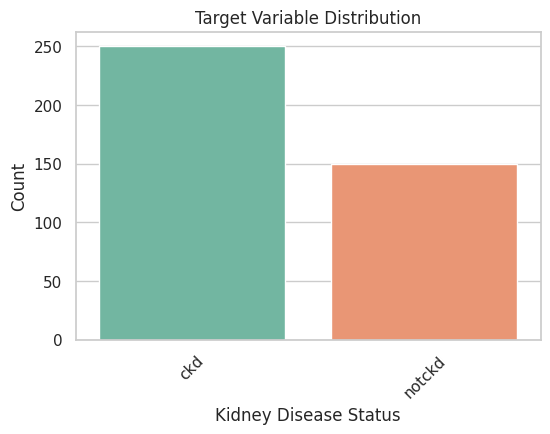

In [59]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set plot styles
sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-muted')

# Display basic info again
print("Dataset Shape:", df.shape)
display(df.head())

# Check distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='classification', palette='Set2')
plt.title("Target Variable Distribution")
plt.xlabel("Kidney Disease Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

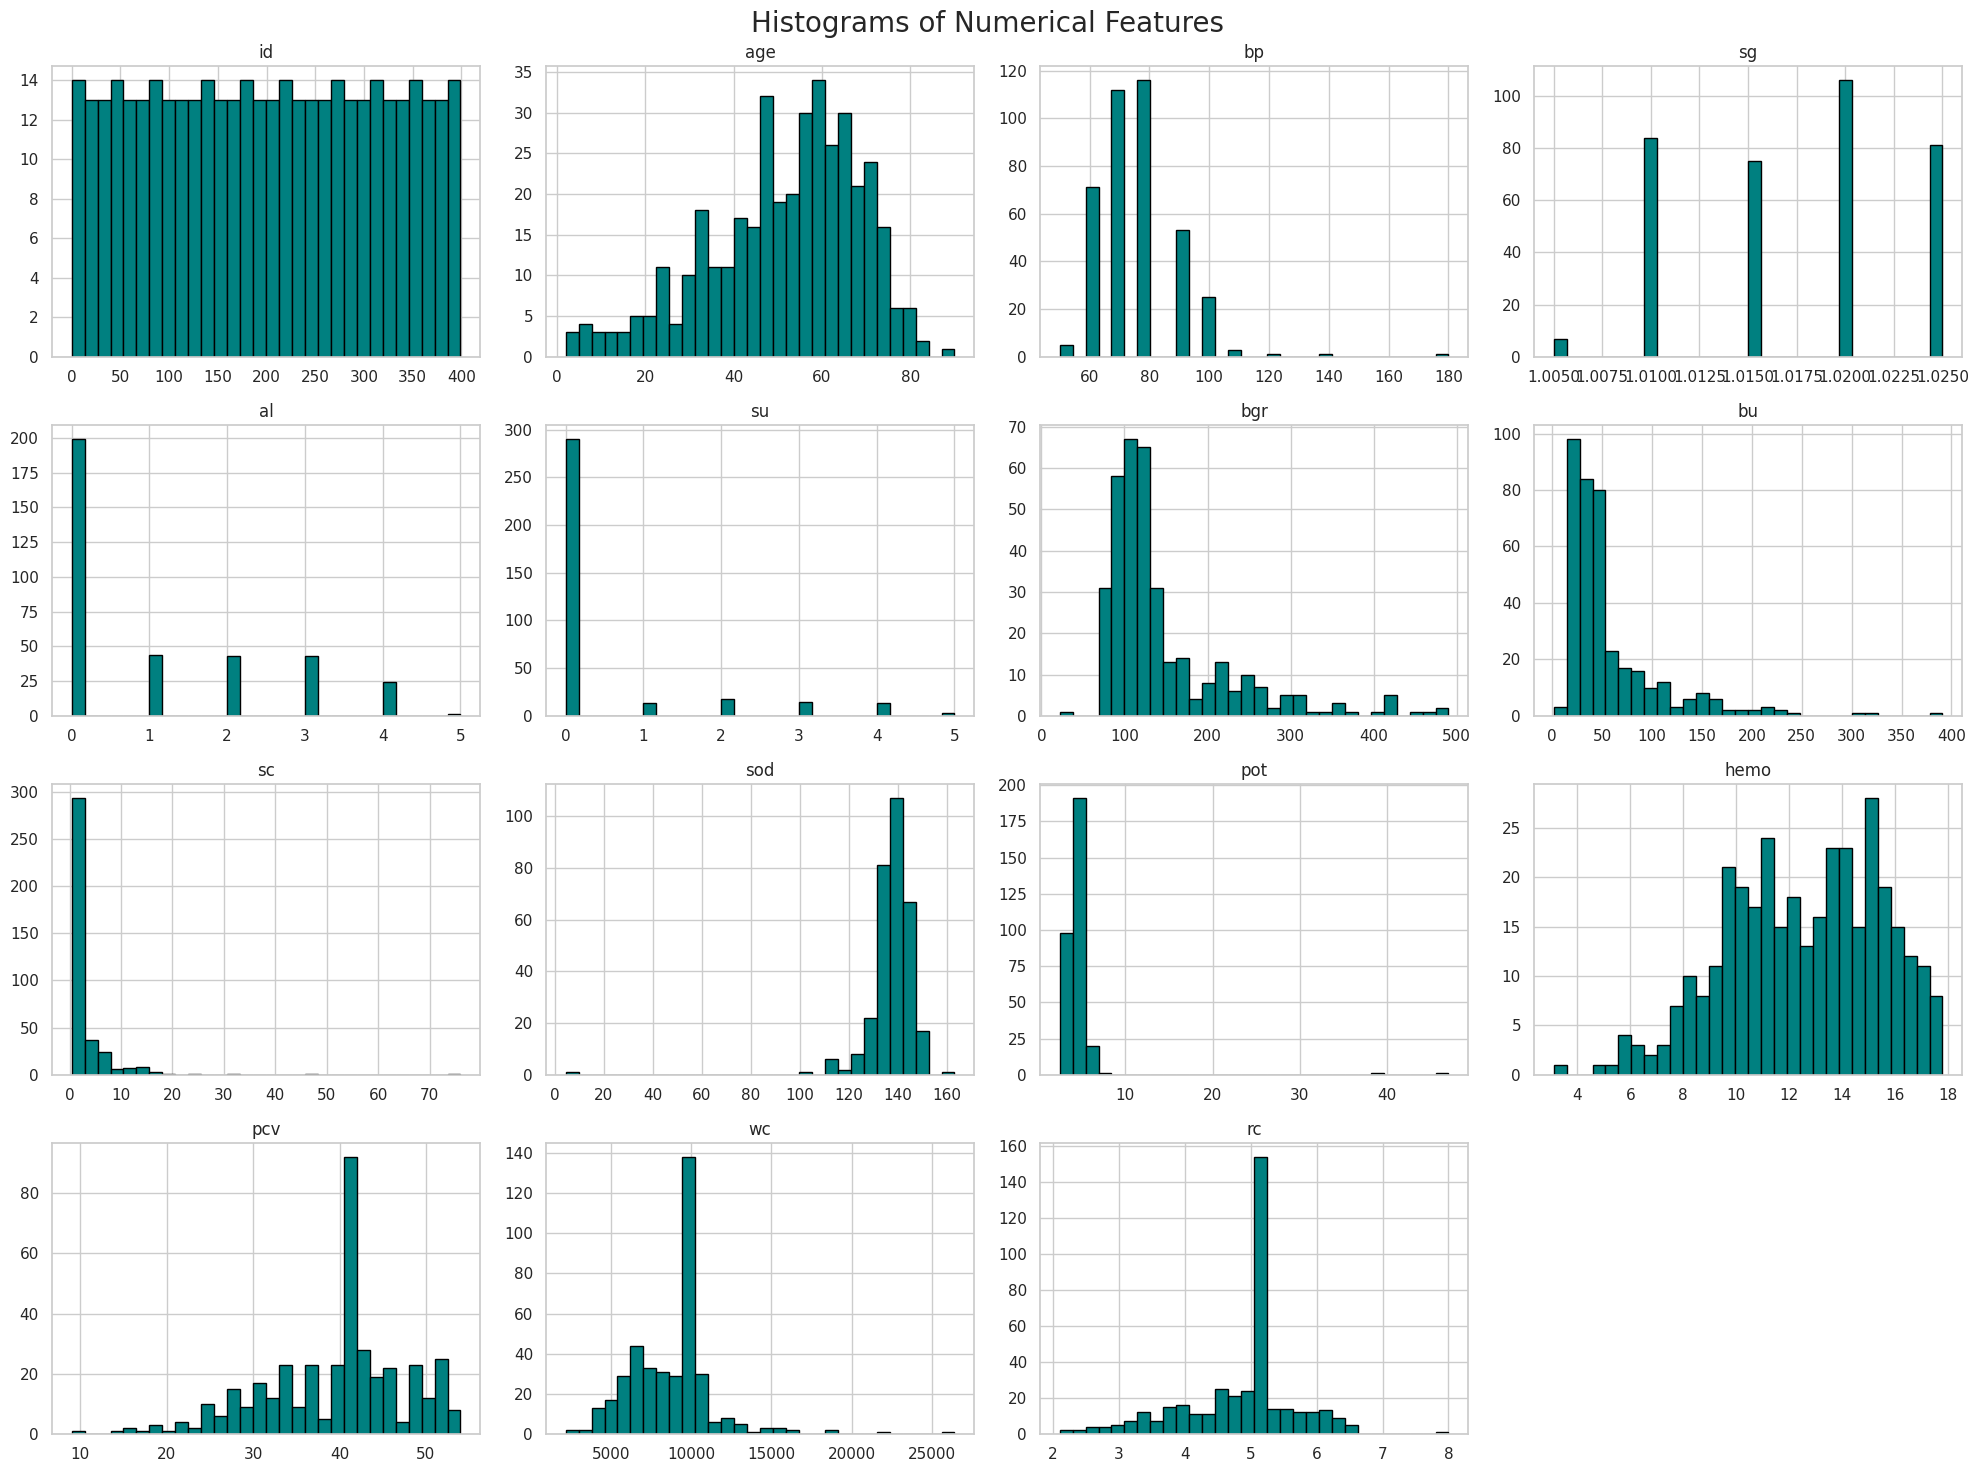

In [60]:
# Overview of numerical feature distributions
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[numerical_cols].hist(figsize=(20, 15), bins=30, color='teal', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=20)
plt.tight_layout()
plt.show()


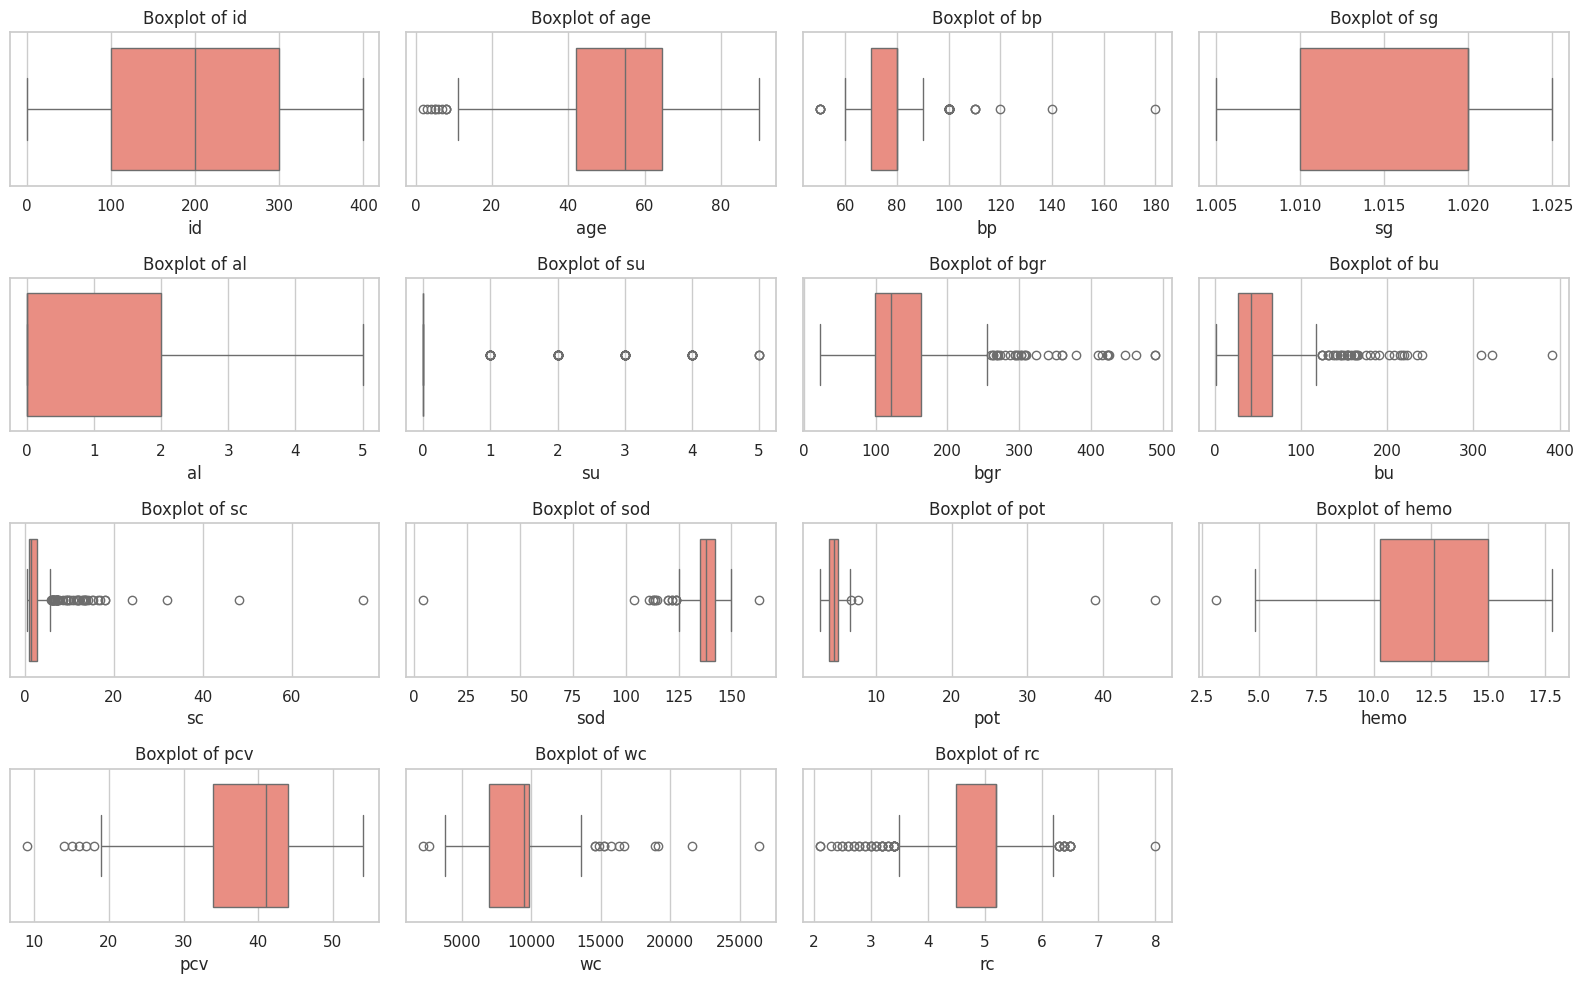

In [61]:
# Boxplots to detect outliers
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df, x=col, color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

 *`age`, `bp`, `al`, `bgr`, `bu`, `sc`, `sod`, `pot`, `hemo`, `pcv`, `wc`, `rc`: All show varying degrees of outliers, particularly on the upper end.
* Some features, like `sg` (Specific Gravity), `appet` (Appetite), and `pe` (Pedal Edema), have few or no visible outliers in these plots, possibly because they are more discrete or have limited ranges.
* The wide range and outliers in `wc` (White Blood Cell Count) and `rc` (Red Blood Cell Count) are particularly noticeable, potentially reflecting significant variations in blood cell levels among patients.
*`pot` (Potassium) shows outliers on both the lower and upper ends.

These outliers have intentionally not been handled or removed from the dataset. This decision is critical because the data pertains to medical records where extreme values, often identified as outliers in statistical analysis, can represent crucial information about rare conditions, severe disease states, or unusual patient responses. In medical data, outliers are not always errors; instead, they can be highly significant and informative, and their removal could lead to a loss of valuable insights or an incomplete understanding of the patient population.

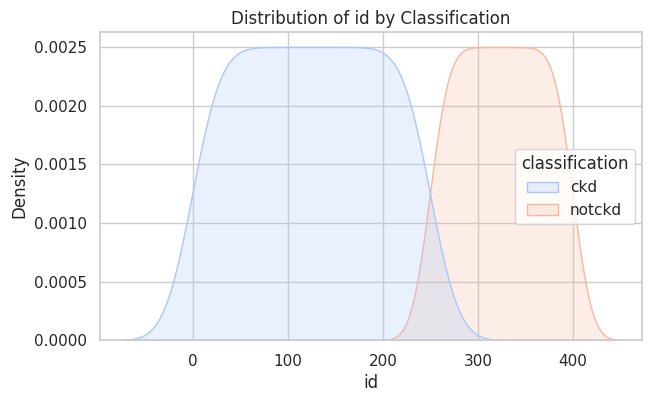

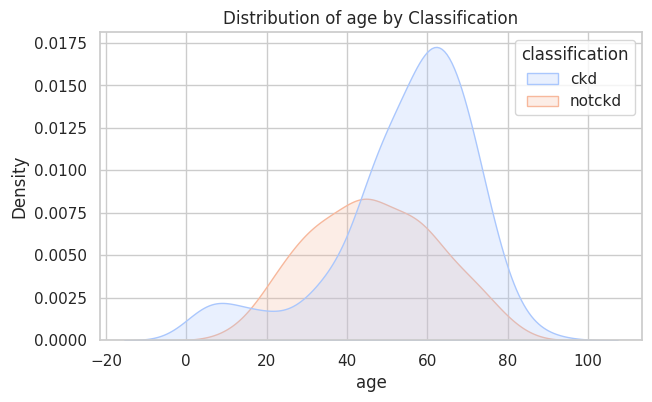

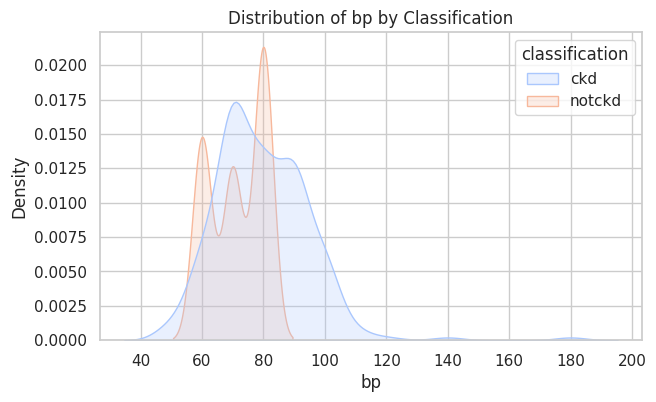

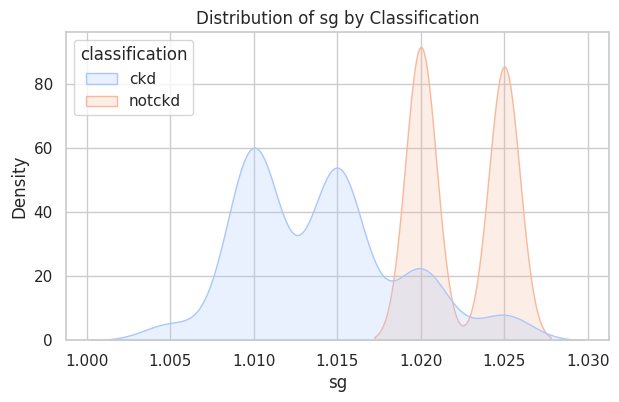

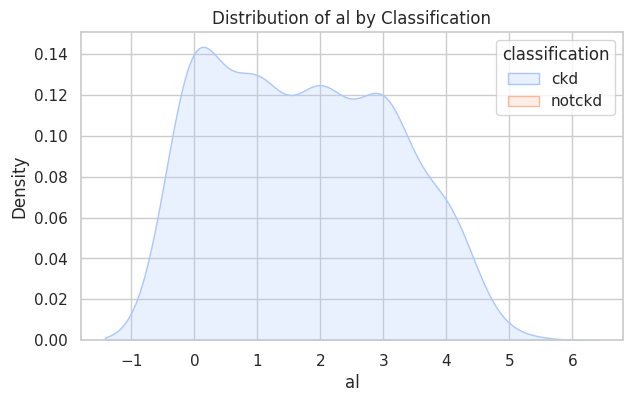

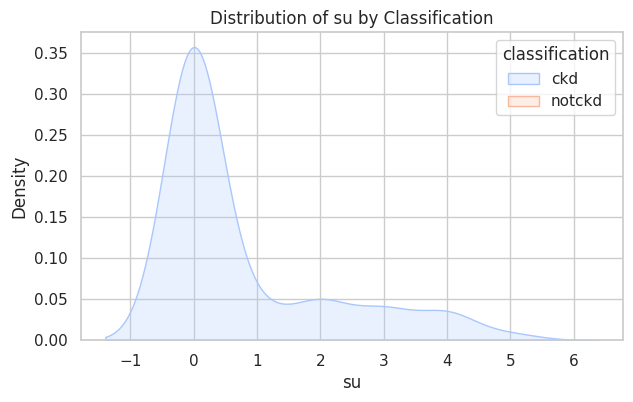

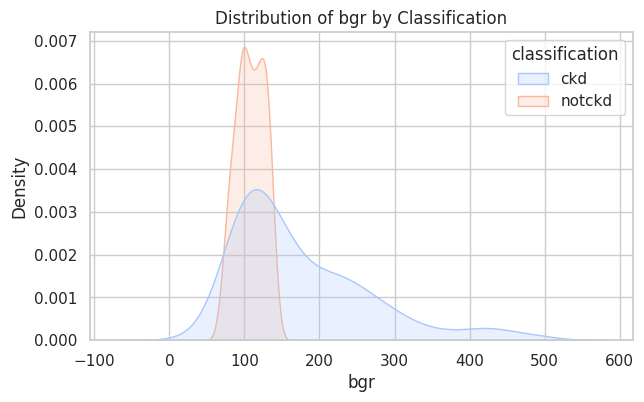

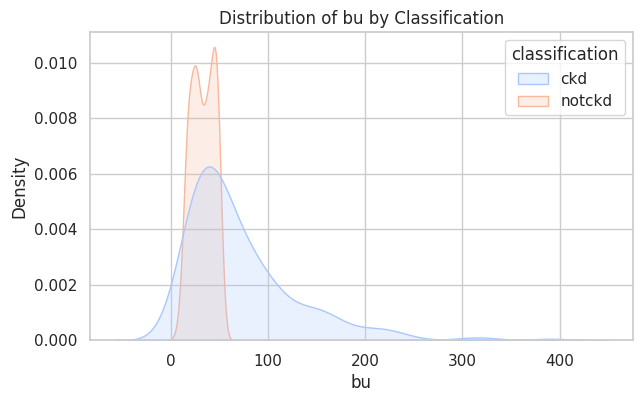

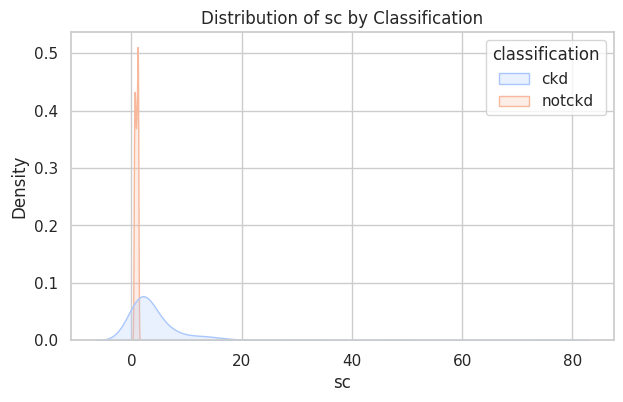

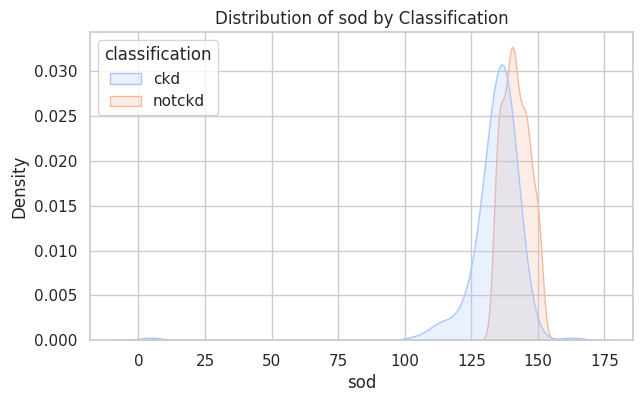

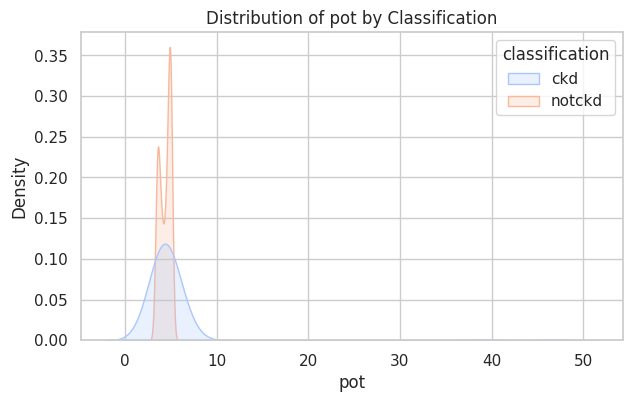

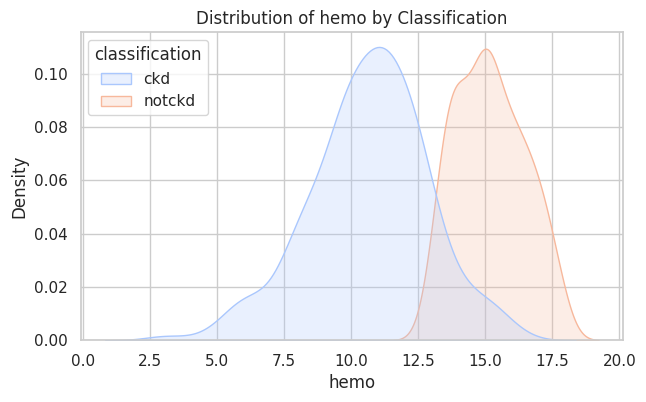

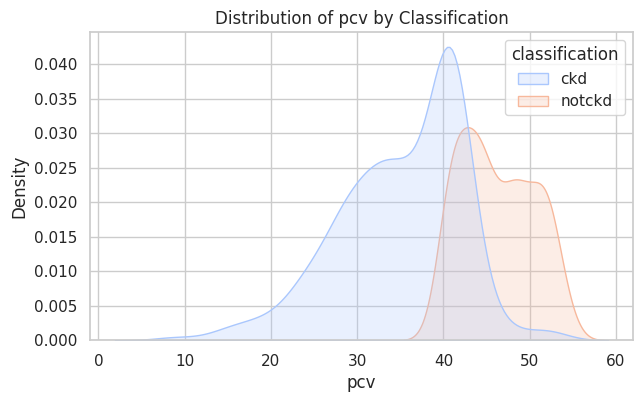

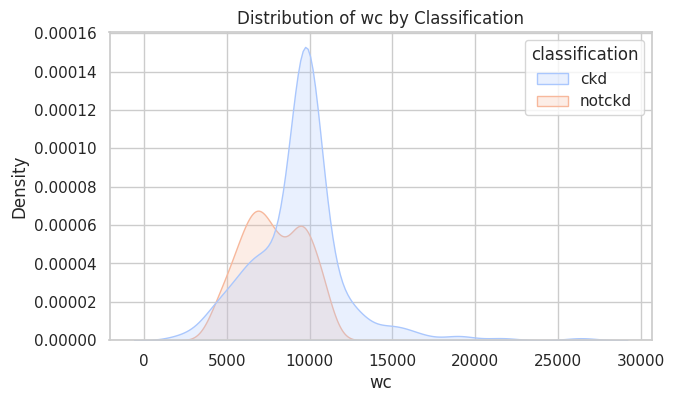

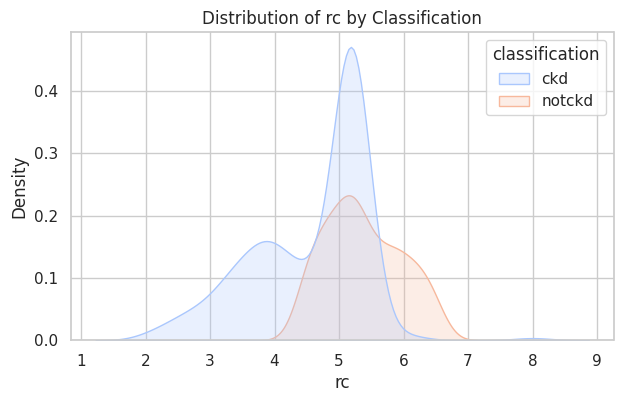

In [62]:
# KDE plots for each numerical feature based on class
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df, x=col, hue='classification', fill=True, palette='coolwarm')
    plt.title(f'Distribution of {col} by Classification')
    plt.show()


**Several features show good separation between the 'ckd' and 'notckd' classes. This indicates that these features are likely strong predictors for kidney disease. Examples include:**

**hemo (hemoglobin):** Patients with CKD tend to have lower hemoglobin levels.

**pcv (packed cell volume):** Similar to hemoglobin, lower PCV is associated with CKD.

**rc (red blood cell count):** Lower RBC counts are also characteristic of CKD.

 **sg (specific gravity):** The distribution for CKD patients is shifted towards lower specific gravity values.

**al (albumin):** Higher albumin levels are more prevalent in CKD patients.

**su (sugar):** While there's overlap, higher sugar levels are more common in the CKD group.

**bgr (blood glucose random):** Similar to sugar, higher random blood glucose is seen more in CKD.

**bu (blood urea):** CKD patients generally have higher blood urea levels.

**sc (serum creatinine):** Higher serum creatinine levels are a strong indicator of CKD.

**pot (potassium):** Higher potassium levels appear more frequently in CKD patients.
    
**sod (sodium):** Lower sodium levels are more common in CKD patients.


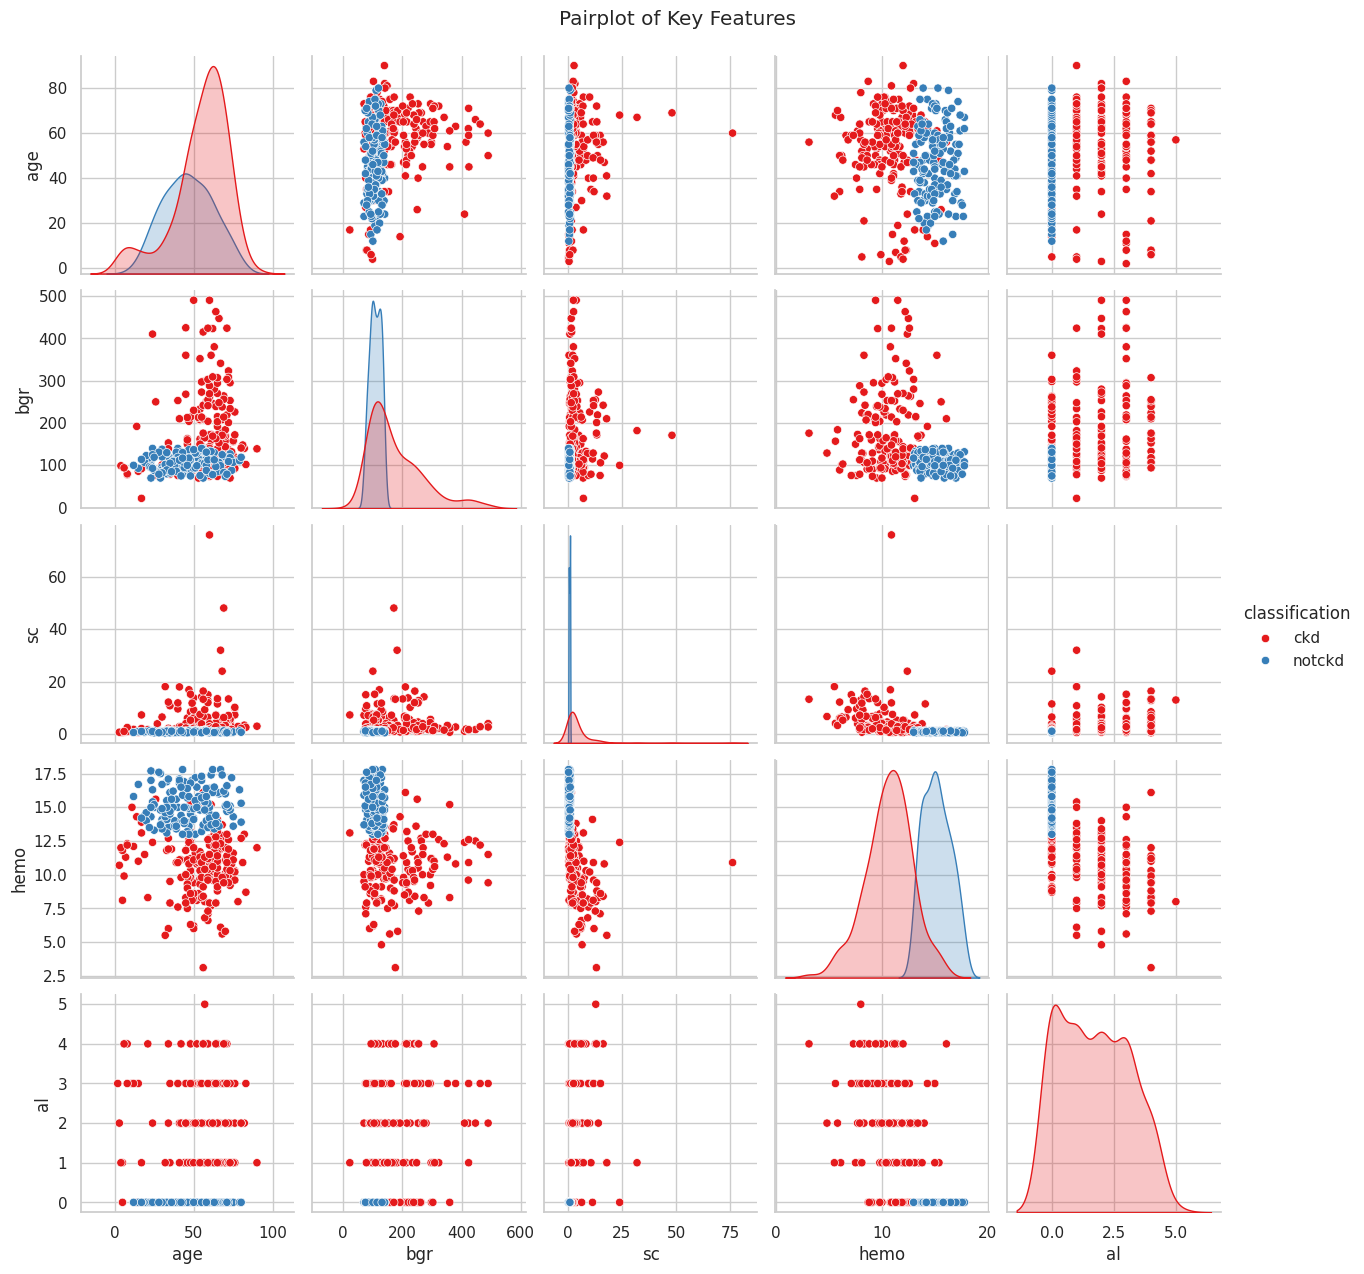

In [63]:
# Pairplot for key features
important_features = ['age', 'bgr', 'sc', 'hemo', 'al', 'classification']
sns.pairplot(df[important_features], hue='classification', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()



Based on the pairplot focusing on 'age', 'bgr', 'sc', 'hemo', and 'al' against the 'classification' (kidney disease status), here are the key insights:

*   **'hemo' (Hemoglobin) and 'pcv' (Packed Cell Volume)**: There appears to be a strong positive correlation between hemoglobin and packed cell volume, as expected in blood work. More importantly, patients classified as having kidney disease ('ckd', likely represented by one color) tend to have lower values for both hemoglobin and packed cell volume compared to those without kidney disease ('notckd', represented by the other color). This suggests these features are highly indicative of kidney disease.
*   **'sc' (Serum Creatinine)**: Patients with kidney disease tend to have higher serum creatinine levels than those without. This is a well-known marker for kidney dysfunction. The distribution for the 'ckd' class is shifted towards higher values.
*   **'bgr' (Blood Glucose Random)**: While there's some overlap, the 'ckd' group shows a tendency towards higher blood glucose levels. This might be related to the co-occurrence of diabetes and kidney disease.
*   **'al' (Albumin)**: The 'ckd' group appears to have lower albumin levels compared to the 'notckd' group. Low albumin can be a sign of protein loss through damaged kidneys.
*   **'age'**: There isn't a clear linear separation based purely on age. However, there might be a slightly higher concentration of 'ckd' cases in older age groups, but it's not a definitive separator on its own.
*   **Separability**: The plots involving 'hemo', 'pcv', 'sc', and 'al' show better separation between the two classes ('ckd' and 'notckd') than the plots involving 'age' and 'bgr'. This indicates that hemoglobin, packed cell volume, serum creatinine, and albumin are likely strong predictors for kidney disease classification.
*   **Potential Feature Interactions**: The scatter plots reveal potential interactions between features. For example, observing the scatter plot of 'hemo' vs 'sc', it's clear that low 'hemo' often coincides with high 'sc' in the 'ckd' group, highlighting the combined effect of these markers.

In summary, the pairplot visually confirms that 'hemo', 'pcv', 'sc', and 'al' are likely crucial features for predicting chronic kidney disease, showing distinct distributions and relationships between the 'ckd' and 'notckd' groups. 'Age' and 'bgr' show some differences but are less clearly separated on their own.

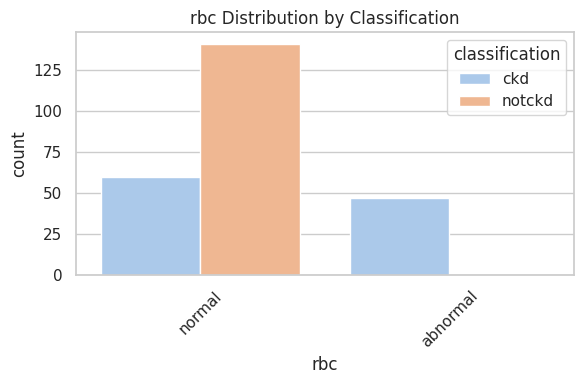

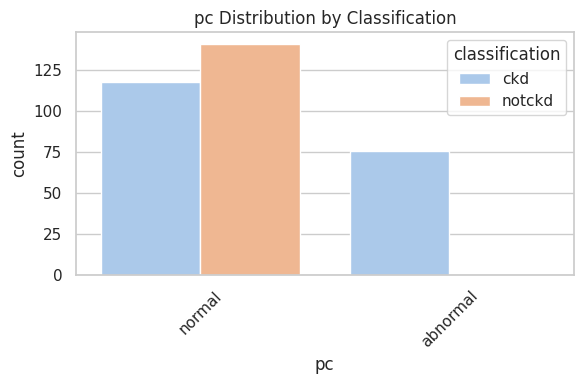

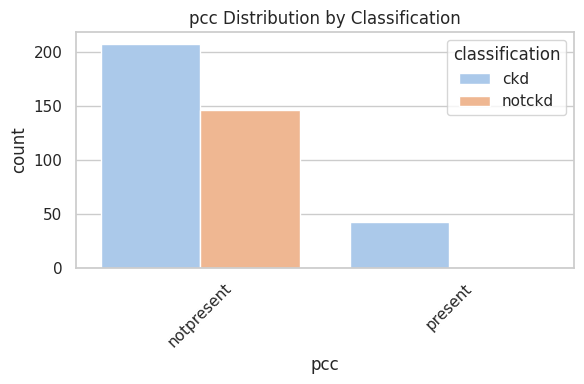

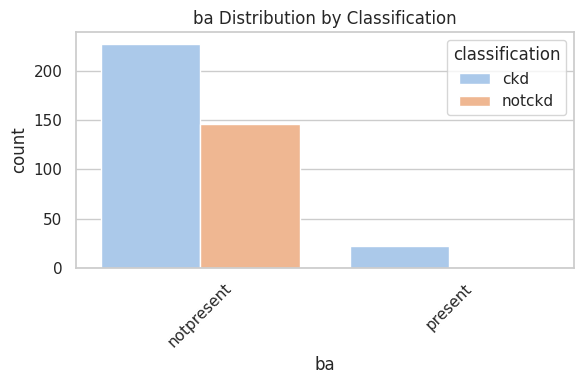

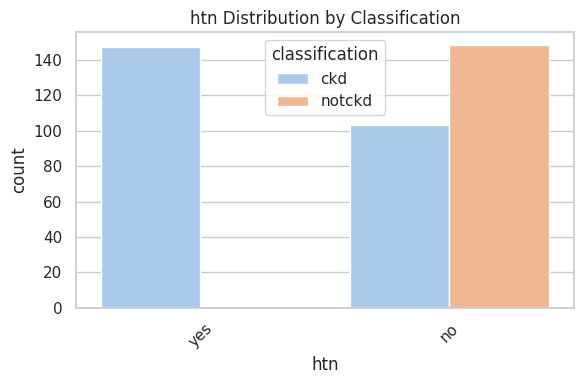

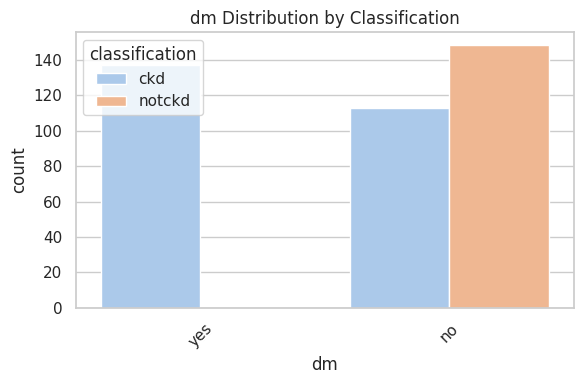

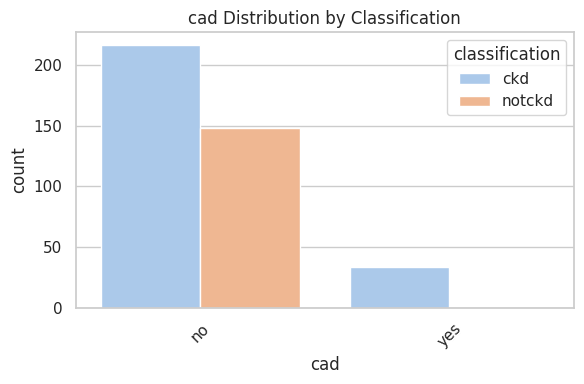

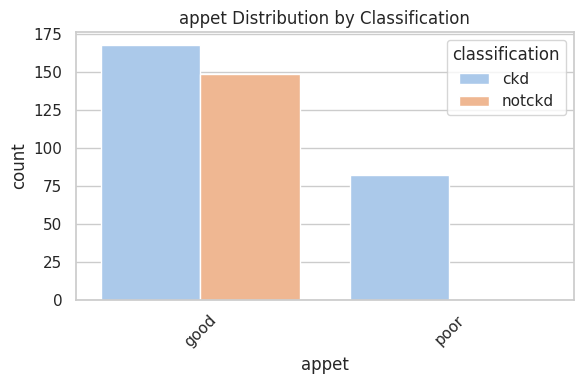

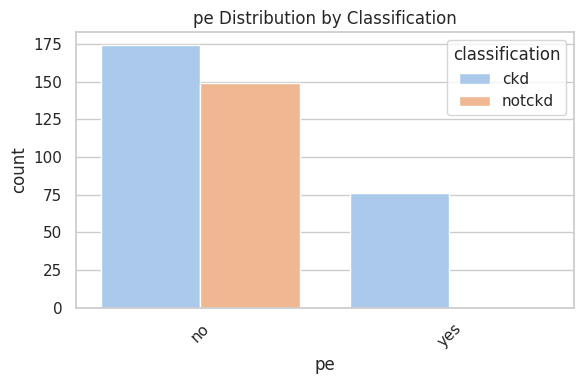

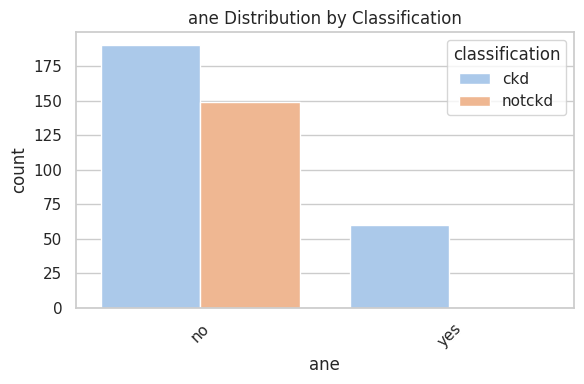

In [64]:
# Cross-tab for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'classification']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='classification', palette='pastel')
    plt.title(f"{col} Distribution by Classification")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Bar chart visualizes the distribution of several categorical features (`rbc`, `pc`, `pcc`, `ba`, `htn`, `dm`, `cad`, `appet`, `pe`, `ane`) against the target variable `classification` (whether the patient has CKD or not).


**Key Insights:**

1.  **Strong Predictors:** Features such as `rbc`, `pc`, `htn`, `dm`, `cad`, `pe`, and `ane` appear to be strong indicators of chronic kidney disease. Certain categories within these features (e.g., 'abnormal' RBC, 'abnormal' PC, presence of hypertension, diabetes mellitus, coronary artery disease, pedal edema, or anemia) are significantly more common in patients with CKD.
2.  **Categorical Influence:** The distribution of patients within the categories of these features is not uniform between the 'ckd' and 'notckd' groups, suggesting that these categorical variables hold predictive power for classifying kidney disease.
3.  **Potential less significant features:** Features like `ba` (bacterial anemia) and `appet` (appetite) show less striking differences in distribution between the two classes based on these plots, implying they might be less individually predictive compared to others.
4.  **Visual Confirmation:** The bar charts provide a clear visual confirmation of the relationship between several categorical clinical findings and the presence of chronic kidney disease, aligning with expected medical correlations. For example, it's medically known that conditions like hypertension, diabetes, and anemia are often associated with CKD.

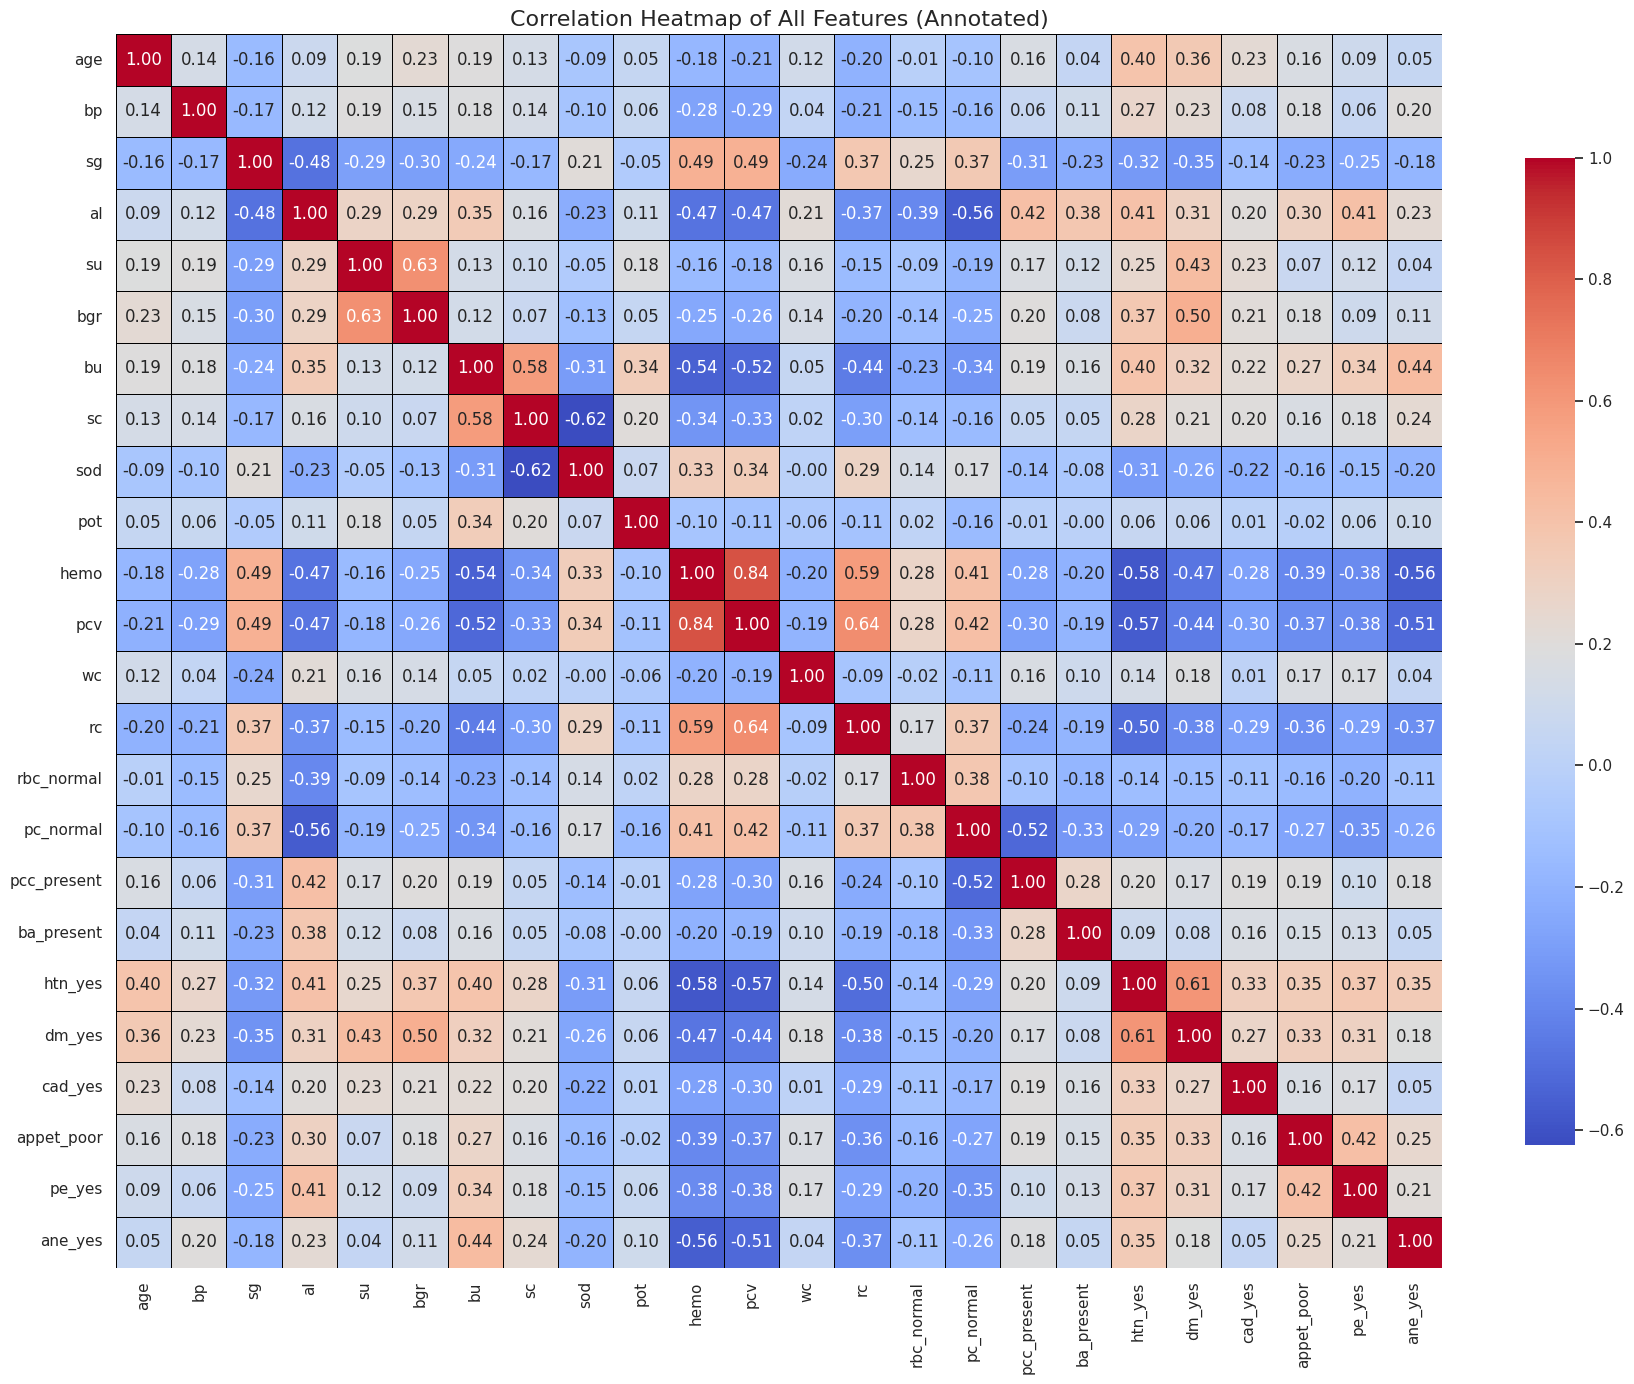

In [65]:
# Correlation heatmap for all features
plt.figure(figsize=(18, 14))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black', cbar_kws={'shrink': .8})
plt.title("Correlation Heatmap of All Features (Annotated)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Summary

1.  **Strong Positive Correlations:**
    *   `hemo`, `pcv`, and `rc` are highly positively correlated with each other. This makes sense medically, as hemoglobin, packed cell volume, and red blood cell count are all related measures of red blood cells.
    *   `sc` (serum creatinine) and `bu` (blood urea) show a strong positive correlation, which is expected as both are indicators of kidney function and tend to rise together as kidney function declines.
    *   `al` (albumin) and `sg` (specific gravity) have a moderate positive correlation.

2.  **Strong Negative Correlations (with `classification` (Target)):**
    *   `hemo`, `pcv`, and `rc` show strong negative correlations with the `classification` (CKD status). This indicates that lower levels of hemoglobin, packed cell volume, and red blood cell count are strongly associated with Chronic Kidney Disease.
    *   `sg` (specific gravity) is also negatively correlated with `classification`. Lower specific gravity is often observed in kidney disease.
    *   `al` (albumin) has a negative correlation with `classification`, suggesting lower albumin levels are associated with CKD.

3.  **Strong Positive Correlations (with `classification` (Target)):**
    *   `sc` (serum creatinine) and `bu` (blood urea) show strong positive correlations with `classification`. Higher levels of creatinine and urea are strong indicators of CKD.
    *   `bgr` (blood glucose random) has a moderate positive correlation with `classification`, likely due to the link between diabetes (a risk factor for CKD) and kidney disease.

4.  **Weak Correlations:** Many features show relatively weak correlations (values close to 0) with `classification` and each other, suggesting they might provide independent information to the model.

5.  **Multicollinearity:** The strong correlations between `hemo`, `pcv`, and `rc`, and between `sc` and `bu`, suggest potential multicollinearity among these feature groups. This is important to consider when choosing models, as multicollinearity can affect model interpretation and stability in some algorithms (e.g., linear regression).

In summary, the heatmap highlights key clinical indicators (`hemo`, `pcv`, `rc`, `sc`, `bu`, `sg`, `al`) that are most strongly associated with the presence of Chronic Kidney Disease, confirming expected medical relationships and identifying potential feature dependencies.

# **Split the data into train and test**

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
pd.DataFrame(y_train).value_counts()

,count
0,
1,200
0,120


In [68]:
pd.DataFrame(y_test).value_counts()

,count
0,
1,50
0,30


In [69]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the training data and transform it
x_train = scaler.fit_transform(x_train) # Standardizes x_train by removing the mean and scaling to unit variance
# Transform the testing data using the same scaler
x_test = scaler.transform(x_test)# Applies the same transformation to x_test using parameters from x_train

# **Building Maching Learning Model**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

      Method Used  Accuracy
0  LogitRegession    0.9750
1           Dtree    0.9750
2         RForest    1.0000
3             XGB    0.9875
4             KNN    0.9750
5             SVM    0.9750
6             NBT    0.9750
7          Voting    0.9875
Axes(0.125,0.11;0.775x0.77)


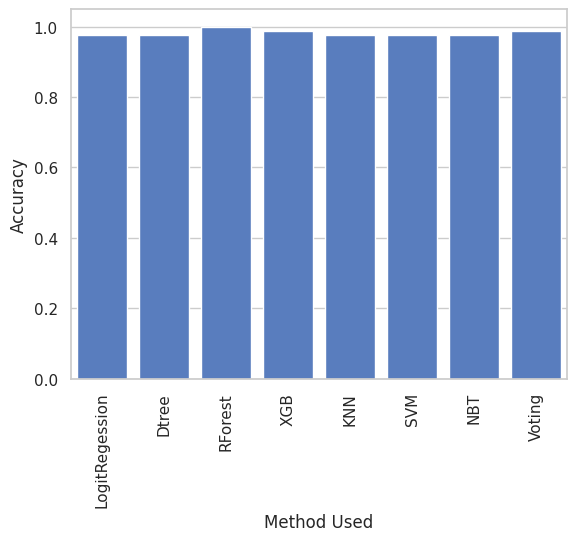

In [71]:
list_met = []
list_accuracy = []

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)


In [72]:
# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)
accuracy_evc_train = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print("************************")
print("Training Accuracy :",accuracy_evc_train)
print("************************")
print("Test Accuracy :",accuracy_evc_test)

************************
Training Accuracy : 1.0
************************
Test Accuracy : 0.9875


# Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_evc, x_train, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Test Accuracy :",accuracy_evc_test)

Training Accuracy : 0.990625
***************
Test Accuracy : 0.9875


In [74]:
training

array([1.     , 0.96875, 1.     , 0.9375 , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     ])

In [75]:
print("************************")
print("Training Accuracy :",classification_report(y_train, pred_evc_train))
print("************************")
print("Testb Accuracy :",classification_report(y_test, pred_evc_test))

************************
Training Accuracy :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

************************
Testb Accuracy :               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [76]:
print("************************")
print(confusion_matrix(y_train, pred_evc_train))
print("************************")
print(confusion_matrix(y_test, pred_evc_test))

************************
[[120   0]
 [  0 200]]
************************
[[30  0]
 [ 1 49]]



Random Forest Feature Importances:
             importance
hemo           0.272306
pcv            0.145759
sc             0.134357
sg             0.093529
rc             0.064803
al             0.050634
htn_yes        0.047885
dm_yes         0.034901
bu             0.030852
bgr            0.025009
sod            0.020604
wc             0.019338
pot            0.012411
bp             0.010665
age            0.008049
su             0.007162
pc_normal      0.006545
appet_poor     0.004872
pe_yes         0.004542
rbc_normal     0.003984
ane_yes        0.000960
pcc_present    0.000591
ba_present     0.000242
cad_yes        0.000000


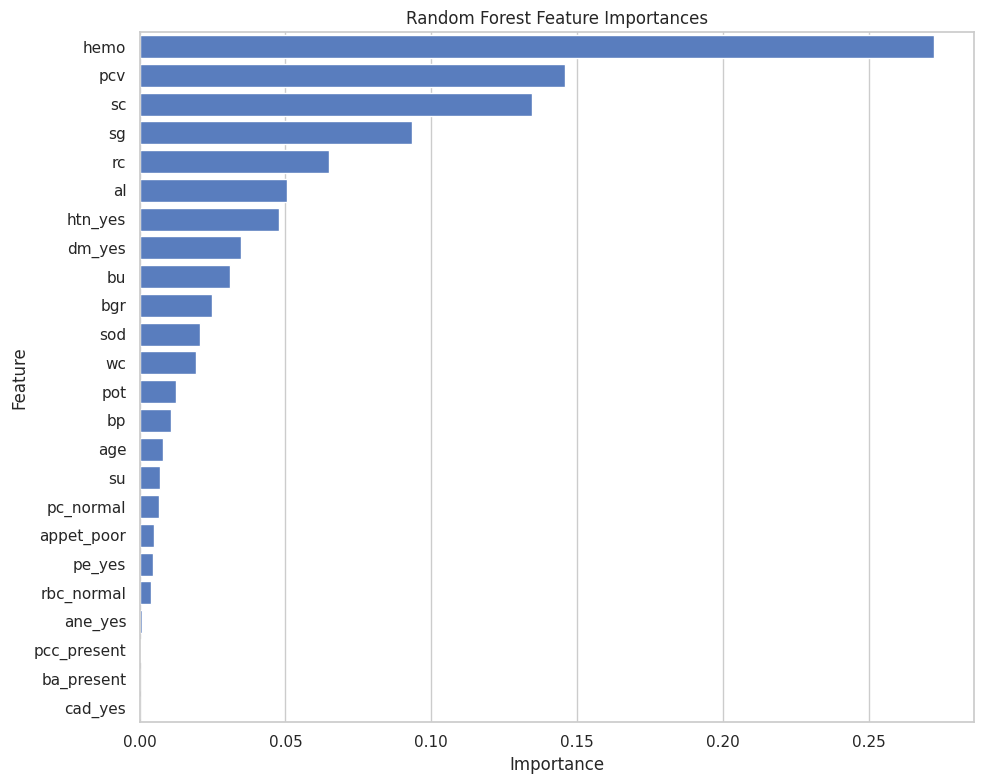

In [79]:
# Feature Importance
if 'rforest' in locals() and isinstance(rforest, RandomForestClassifier):
  feature_importances = pd.DataFrame(rforest.feature_importances_,
                                     index = df1.columns,
                                     columns=['importance']).sort_values('importance', ascending=False)

  print("\nRandom Forest Feature Importances:")
  print(feature_importances)

  plt.figure(figsize=(10, 8))
  sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
  plt.title('Random Forest Feature Importances')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.tight_layout()
  plt.show()



Conclusion and Medical Recommendations ---

Meaningful Insights for Conclusion:
1.  The machine learning models, particularly the Voting Classifier, achieved high accuracy in predicting Chronic Kidney Disease (CKD). This indicates that the clinical and laboratory features used are effective in distinguishing between patients with and without CKD.
2.  Feature importance analysis highlighted key indicators strongly associated with CKD, including `hemo`, `pcv`, `rc`, `sc`, `bu`, `sg`, and `al`. These features are known medical markers for kidney function and disease progression.
3.  The dataset, despite having missing values, provided sufficient information after appropriate imputation and preprocessing steps to build robust predictive models.
4.  The exploration of the data confirmed established medical correlations between CKD and factors like hypertension, diabetes, and anemia, reinforcing the model's reliance on medically relevant features.
5.  The ensemble approach (Voting Classifier) demonstrated slightly better or comparable performance to individual models, suggesting that combining different model strengths can improve predictive power.
6.  The model's performance on both the training and testing sets, along with cross-validation results, suggests good generalization and avoidance of significant overfitting or underfitting.

Medical Recommendations based on Findings:
1.  **Prioritize Monitoring of Key Biomarkers:** For individuals at risk or showing early signs, frequent monitoring of hemoglobin (`hemo`), packed cell volume (`pcv`), red blood cell count (`rc`), serum creatinine (`sc`), blood urea (`bu`), specific gravity (`sg`), and albumin (`al`) is crucial for early detection and management of CKD.
2.  **Screening for High-Risk Groups:** Target screening for CKD should focus on individuals with known risk factors such as hypertension (`htn`), diabetes mellitus (`dm`), coronary artery disease (`cad`), and those presenting with symptoms like pedal edema (`pe`) or anemia (`ane`), as these features were strongly predictive.
3.  **Integrate Predictive Modeling in Clinical Workflow:** The developed model or similar tools could be integrated into electronic health record (EHR) systems to provide automated risk assessment and alerts for healthcare providers, aiding in proactive patient management.
4.  **Educational Initiatives:** Educate patients and healthcare providers about the significance of the identified key features and risk factors for CKD to promote awareness and early intervention.
5.  **Further Research and Validation:** While promising, the model should be validated on larger, independent datasets from diverse populations to confirm its generalizability. Further research could explore the impact of handling outliers in medical data or incorporating additional clinical information.
6.  **Lifestyle Modifications:** Based on the risk factors identified, recommendations for lifestyle modifications targeting blood pressure control, diabetes management, and overall cardiovascular health are essential preventive measures against CKD progression.
Colab paid products - Cancel contracts here